
Test case:
1. y' = 2 - y/x; y(1) = 0 với khoảng xác định [0.8,1.2] x [-0.5,0.5]
So sánh với nghiệm đúng y = x - 1/x. Tính đc M = 2.5 L = 1.2
2. y' = 1 + (x - y)^2; y(2) = 1 với khoảng xác định [1.5,3] x [-1,3]. So sánh với nghiệm đúng y = x + 1/(1-x)



In [17]:
import numpy as np
import matplotlib.pyplot as plt #thư viện vẽ hình
from sympy import * #thư viện để tính toán các hàm 

In [18]:
from google.colab import drive
drive.mount('/content/drive')

%cd ..
%cd /content/drive/MyDrive/PPS/Picard

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PPS
/content/drive/MyDrive/PPS/Picard


In [19]:
# Cận dưới, cận trên của x và y
# Yt, Ys = -1,3
# Xt, Xs = -1.2, 0
# y0, x0 = 0, 0.5
# Sai số
# eps = 1e-4

In [20]:
# Hàm f(x, y)
#y = symbols('y')
#x = symbols('x')
#f = pi*cos(pi*x)

In [21]:
def input(file):
  with open(file) as file_handler:
    f = file_handler.readline()
    Yt, Ys, Xt, Xs, y0, x0, eps = [float(item) for item in file_handler.readline().split()]
  
  return f, Yt, Ys, Xt, Xs, y0, x0, eps

f, Yt, Ys, Xt, Xs, y0, x0, eps = input('input1.txt')
y = symbols('y')
x = symbols('x')
f = sympify(f)
print(f, Yt, Ys, Xt, Xs, y0, x0, eps)

2 - y/x -0.5 0.5 0.8 1.2 0.0 1.0 0.0001


In [22]:
M = 120
L = 100

In [23]:
def NumericIntegrate(f, xy_n, y0, h, eps): 
    m = (int) (len(xy_n)/2)
    maxError = -1
    loop = 0
    while abs(maxError) > eps:
        loop += 1
        maxError = -1

        integral = 0
        for i in range(m, 0, -1):
            integral = integral - (h / 2) * (f.subs([(x, xy_n[i][0]), (y, xy_n[i][1])]) + f.subs([(x, xy_n[i - 1][0]), (y, xy_n[i - 1][1])]))
            newValue = y0 + integral
            error = abs(xy_n[i - 1][1] - newValue)
            xy_n[i - 1][1] = newValue
            if(error > maxError): maxError = error

        integral = 0
        for i in range(m, 2 * m):
            integral = integral + (h / 2) * (f.subs([(x, xy_n[i][0]), (y, xy_n[i][1])]) + f.subs([(x, xy_n[i + 1][0]), (y, xy_n[i + 1][1])]))
            newValue = y0 + integral
            error = abs(xy_n[i + 1][1] - newValue)
            xy_n[i + 1][1] = newValue
            if(error > maxError): maxError = error

    return xy_n

In [24]:
def Pica(f, Xt, Xs, Yt, Ys, x0, y0, M, L, eps, delta_x = None, length = 62):
    
    delta_y = min(y0-Yt, Ys-y0)
    if delta_x is None:
        delta_x = min(delta_y/M, 1/(2*L))
        delta_x = min(delta_x, x0-Xt, Xs-x0)
    h = 2 * delta_x / length 
          
    n = (int)(length / 2)
    xy_n = []
    for i in range(-n, n + 1):
        xy_n.append([x0 + i * h , y0])

    # print("yn", yn)
    xy_n = NumericIntegrate(f, xy_n, y0, h, eps)

    print(x0 - delta_x, x0 + delta_x)
    return xy_n, x0 - delta_x, x0 + delta_x

In [25]:
result, x_left, x_right = Pica(f, Xt, Xs, Yt, Ys, x0, y0, M, L, eps, delta_x = None, length = 5)
print(result)
# print("Số điểm: ", len(result))

0.9958333333333333 1.0041666666666667
[[0.9966666666666667, -0.00667781028193252], [0.9983333333333333, -0.00333611574846967], [1.0, 0.0], [1.0016666666666667, 0.00333056017748197], [1.0033333333333334, 0.00665558786680720]]


In [26]:
result = np.array(result)
print(result)

[[0.9966666666666667 -0.00667781028193252]
 [0.9983333333333333 -0.00333611574846967]
 [1.0 0.0]
 [1.0016666666666667 0.00333056017748197]
 [1.0033333333333334 0.00665558786680720]]


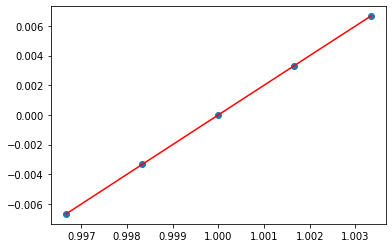

In [27]:
def PlotPairs(pairList):
    x,y = zip(*pairList)
    x = np.array(x)
    y = np.array(y)
    # y = y * (10**3)
    plt.scatter(x,y)

    x = np.linspace(x[0], x[len(x) - 1], num=100)

    authentic_f = x - 1/x
    # authentic_f = authentic_f * (10**3)
    plt.plot(x, authentic_f, color = 'red')

    # plt.scatter() #plt.plot()
    plt.show()



PlotPairs(result)